# Ananlyse trees from tsinfer

In [2]:
library(tidyverse)
library(ape)
library(data.table)
library(tictoc)

setwd('/Users/apal/Phd/Projects/2021-snap_hap/ARGs')

In [3]:
## Function ----
get_tmrcas <- function(treeList, inds1, inds2){
  tmp_treeList = treeList
  tmrca_total = c()
  tmrca_YF3 = c()
  tmrca_MF3 = c()
  
  for(treeID in 1:nrow(treeList)){
    tmp_tr = read.tree(text = treeList$tree[treeID])
    tmp_tmrcaTotal = max(node.depth.edgelength(tmp_tr))
    tmp_tmrcaYF3 = max(node.depth.edgelength(keep.tip(tmp_tr, inds1)))
    tmp_tmrcaMF3 = max(node.depth.edgelength(keep.tip(tmp_tr, inds2)))
    
    tmrca_total = c(tmrca_total, tmp_tmrcaTotal)
    tmrca_YF3 = c(tmrca_YF3, tmp_tmrcaYF3)
    tmrca_MF3 = c(tmrca_MF3, tmp_tmrcaMF3)
  }
  
  tmp_treeList$tmrcaTotal = tmrca_total
  tmp_treeList$tmrcaYF3 = tmrca_YF3
  tmp_treeList$tmrcaMF3 = tmrca_MF3
  
  return(tmp_treeList)
}
get_windowed_tmrcas <- function(treeList, start, end, windowSize, stepSize){
  # start = 52800000
  # end = 53200000
  # windowSize = 10000
  # stepSize = 1000
  
  windowStarts = seq(start, end-stepSize, stepSize)
  windowEnds = seq((start+stepSize), end, stepSize)
  
  tmpWinTrees = data.table()
  # (winStart, winEnd, winTMRCA, winTMRCA_wYF, winTMRCA_wMF)
  for(winID in 1:length(windowStarts)){
    # winID=1
    winStart = windowStarts[winID]
    winEnd = windowEnds[winID]
    winTrees = treeList[treeEnd>=winStart & treeStart<=winEnd]
    winTMRCA = median(winTrees$tmrcaTotal)
    winTMRCA_wYF = median(winTrees$tmrcaYF3)
    winTMRCA_wMF = median(winTrees$tmrcaMF3)
    
    winPairTMRCA_wYF_mean = median(winTrees$mean_pairTMRCA_wYF3)
    winPairTMRCA_wYF_median = median(winTrees$median_pairTMRCA_wYF3)
    winPairTMRCA_wYF_min = median(winTrees$min_pairTMRCA_wYF3)
    winPairTMRCA_wYF_max = median(winTrees$max_pairTMRCA_wYF3)

    winPairTMRCA_wMF_mean = median(winTrees$mean_pairTMRCA_wMF3)
    winPairTMRCA_wMF_median = median(winTrees$median_pairTMRCA_wMF3)
    winPairTMRCA_wMF_min = median(winTrees$min_pairTMRCA_wMF3)
    winPairTMRCA_wMF_max = median(winTrees$max_pairTMRCA_wMF3)
    
    winCrossPairTMRCA_mean = median(winTrees$mean_crosspairTMRCA)
    winCrossPairTMRCA_median = median(winTrees$mean_crosspairTMRCA)
    winCrossPairTMRCA_min = median(winTrees$min_crosspairTMRCA)
    winCrossPairTMRCA_max = median(winTrees$max_crosspairTMRCA)
    
    tmpWinTrees = rbind(tmpWinTrees,
                        data.table(winStart, winEnd, 
                                   winTMRCA, winTMRCA_wYF, winTMRCA_wMF,
                                   winPairTMRCA_wYF_mean, winPairTMRCA_wYF_median, winPairTMRCA_wYF_min, winPairTMRCA_wYF_max,
                                   winPairTMRCA_wMF_mean, winPairTMRCA_wMF_median, winPairTMRCA_wMF_min, winPairTMRCA_wMF_max,
                                   winCrossPairTMRCA_mean, winCrossPairTMRCA_median, winCrossPairTMRCA_min, winCrossPairTMRCA_max))
  }
  return(tmpWinTrees)
}
get_pairwise_tmrcas <- function(tree, inds1, inds2){
  # inds1 = inds_YF3
  # inds2 = inds_MF3
  
  ## Within inds1
  tr_inds1 = keep.tip(phy = tree, tip = inds1)
  pairTMRCAs = cophenetic.phylo(tr_inds1)/2
  mean_pairTMRCA = mean(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  median_pairTMRCA = median(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  min_pairTMRCA = min(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  max_pairTMRCA = max(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  pairTMRCAs_inds1 =  data.table(mean_pairTMRCA, median_pairTMRCA, min_pairTMRCA, max_pairTMRCA)
  
  # pairTMRCA=c()  
  # inds1_pairs = combn(inds1, 2)
  # for(pairID in 1:ncol(inds1_pairs)){
  #   pair = inds1_pairs[,pairID]
  #   pairTMRCA[pairID] = cophenetic.phylo(tr)[pair[1], pair[2]]/2
  # }
  # mean_pairTMRCA = mean(pairTMRCA)
  # median_pairTMRCA = median(pairTMRCA)
  # min_pairTMRCA = min(pairTMRCA)
  # max_pairTMRCA = max(pairTMRCA)
  # pairTMRCAs_inds1 =  data.table(mean_pairTMRCA, median_pairTMRCA, min_pairTMRCA, max_pairTMRCA)
  
  ## Within inds1
  tr_inds2 = keep.tip(phy = tree, tip = inds2)
  pairTMRCAs = cophenetic.phylo(tr_inds2)/2
  mean_pairTMRCA = mean(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  median_pairTMRCA = median(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  min_pairTMRCA = min(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  max_pairTMRCA = max(pairTMRCAs[col(pairTMRCAs) != row(pairTMRCAs)])
  pairTMRCAs_inds2 =  data.table(mean_pairTMRCA, median_pairTMRCA, min_pairTMRCA, max_pairTMRCA)

  # pairTMRCA=c()  
  # inds2_pairs = combn(inds2, 2)
  # for(pairID in 1:ncol(inds2_pairs)){
  #   pair = inds2_pairs[,pairID]
  #   pairTMRCA[pairID] = cophenetic.phylo(tr)[pair[1], pair[2]]/2
  # }
  # mean_pairTMRCA = mean(pairTMRCA)
  # median_pairTMRCA = median(pairTMRCA)
  # min_pairTMRCA = min(pairTMRCA)
  # max_pairTMRCA = max(pairTMRCA)
  # pairTMRCAs_inds2 =  data.table(mean_pairTMRCA, median_pairTMRCA, min_pairTMRCA, max_pairTMRCA)
  
  pairTMRCAs=c()
  crosspairs = tidyr::expand_grid(inds1, inds2)
  for(pairID in 1:nrow(crosspairs)){
    pair = crosspairs[pairID,]
    pairTMRCAs[pairID] = cophenetic.phylo(tree)[pair[[1]], pair[[2]]]/2
  }
  mean_pairTMRCA = mean(pairTMRCAs)
  median_pairTMRCA = median(pairTMRCAs)
  min_pairTMRCA = min(pairTMRCAs)
  max_pairTMRCA = max(pairTMRCAs)
  crosspairTMRCAs =  data.table(mean_pairTMRCA, median_pairTMRCA, min_pairTMRCA, max_pairTMRCA)
  
  pairTMRCAs = cbind(pairTMRCAs_inds1, pairTMRCAs_inds2, crosspairTMRCAs)
  # colnames(pairTMRCAs) = c(mean_pairTMRCA_wYF3, median_pairTMRCA_wYF3, min_pairTMRCA_wYF3, max_pairTMRCA_wYF3,
  #                          mean_pairTMRCA_wMF3, median_pairTMRCA_wMF3, min_pairTMRCA_wMF3, max_pairTMRCA_wMF3,
  #                          mean_crosspairTMRCA, median_crosspairTMRCA, min_crosspairTMRCA, max_crosspairTMRCA)
  
  return(pairTMRCAs)
}

In [4]:
## Load samples
allSampleData = fread('/Users/apal/Phd/Projects/2021-snap_hap/sample_info/samples_ALL_SnapHapColor_LastUpdate-2024-06.csv')
str(allSampleData)

Classes ‘data.table’ and 'data.frame':	1084 obs. of  29 variables:
 $ PlantID_UPPER                : chr  "PB0464" "PB1042" "PB1008" "PB1253" ...
 $ PlantID                      : chr  "pb0464" "pb1042" "pb1008" "pb1253" ...
 $ PlantID_LongFormat           : chr  "60x-1_Am_Pla_pb0464" "60x-2_Am_Pla_pb1042" "10x-14_Am_Pla_pb1008" "10x-15_Am_Pla_pb1253" ...
 $ PlantID_longFormat_refVersion: chr  "60x-1_Am_Pla_pb0464_v3.5" "60x2-Plate9-17_Am_Pla_pb1042_v3.5" "10x2-14_Am_Pla_pb1008_v3.5" "10x2-15_Am_Pla_pb1253_v3.5" ...
 $ Batch                        : chr  "60x" "60x2" "10x2" "10x2" ...
 $ Batch_PlantID                : chr  "60x_PB0464" "60x2_PB1042" "10x2_PB1008" "10x2_PB1253" ...
 $ PlantID_Batch                : chr  "PB0464_60x" "PB1042_60x2" "PB1008_10x2" "PB1253_10x2" ...
 $ Species                      : chr  "Am" "Am" "Am" "Am" ...
 $ Location                     : chr  "Pla" "Pla" "Pla" "Pla" ...
 $ Coverage_mean                : num  111.4 109.6 25.3 19.8 19.5 ...
 $ Coverage_

In [5]:
## Load RosEl trees
ts_rosel = fread('./ts_run3-20240603_pmFRpyYe-hCov/ts.RosEl.trList.newick.txt')
ts_rosel$treeID=1:nrow(ts_rosel)
## Load neutral trees
# ts_neu = fread('./ts.neu.trList.newick.txt')
# ts_neu$treeID=1:nrow(ts_neu)

In [6]:
Ros1 = c(52889323, 52889737)
Ros2 = c(52912351, 52912777)
El = c(53060761, 53062505)
offset = 52800000

Ne=354349
inds_pmMF = sapply(seq(0,89,1), function(x){paste0('n',x)})
inds_pyYe = sapply(seq(90,189,1), function(x){paste0('n',x)})
windowSize = 10000
stepSize = 1000

In [8]:
ts_rosel = get_tmrcas(ts_rosel, inds_pmMF, inds_pyYe)

In [9]:
str(ts_rosel)

Classes ‘data.table’ and 'data.frame':	13992 obs. of  8 variables:
 $ treeStart : num  52800008 52800099 52800147 52800157 52800162 ...
 $ treeEnd   : num  52800099 52800147 52800157 52800162 52800168 ...
 $ treeSpan  : num  91 48 10 5 6 56 20 32 21 147 ...
 $ tree      : chr  "(n1:959722.42594036890659481,n3:959722.42594036890659481,n6:959722.42594036890659481,n35:959722.425940368906594"| __truncated__ "(n1:996868.59079169621691108,n3:996868.59079169621691108,n6:996868.59079169621691108,n35:996868.590791696216911"| __truncated__ "(n1:996868.59079169621691108,n3:996868.59079169621691108,n6:996868.59079169621691108,n35:996868.590791696216911"| __truncated__ "(n1:996868.59079169621691108,n3:996868.59079169621691108,n6:996868.59079169621691108,n35:996868.590791696216911"| __truncated__ ...
 $ treeID    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ tmrcaTotal: num  959722 996869 996869 996869 996869 ...
 $ tmrcaYF3  : num  959722 996869 996869 996869 996869 ...
 $ tmrcaMF3  : num  959722 996869 99686

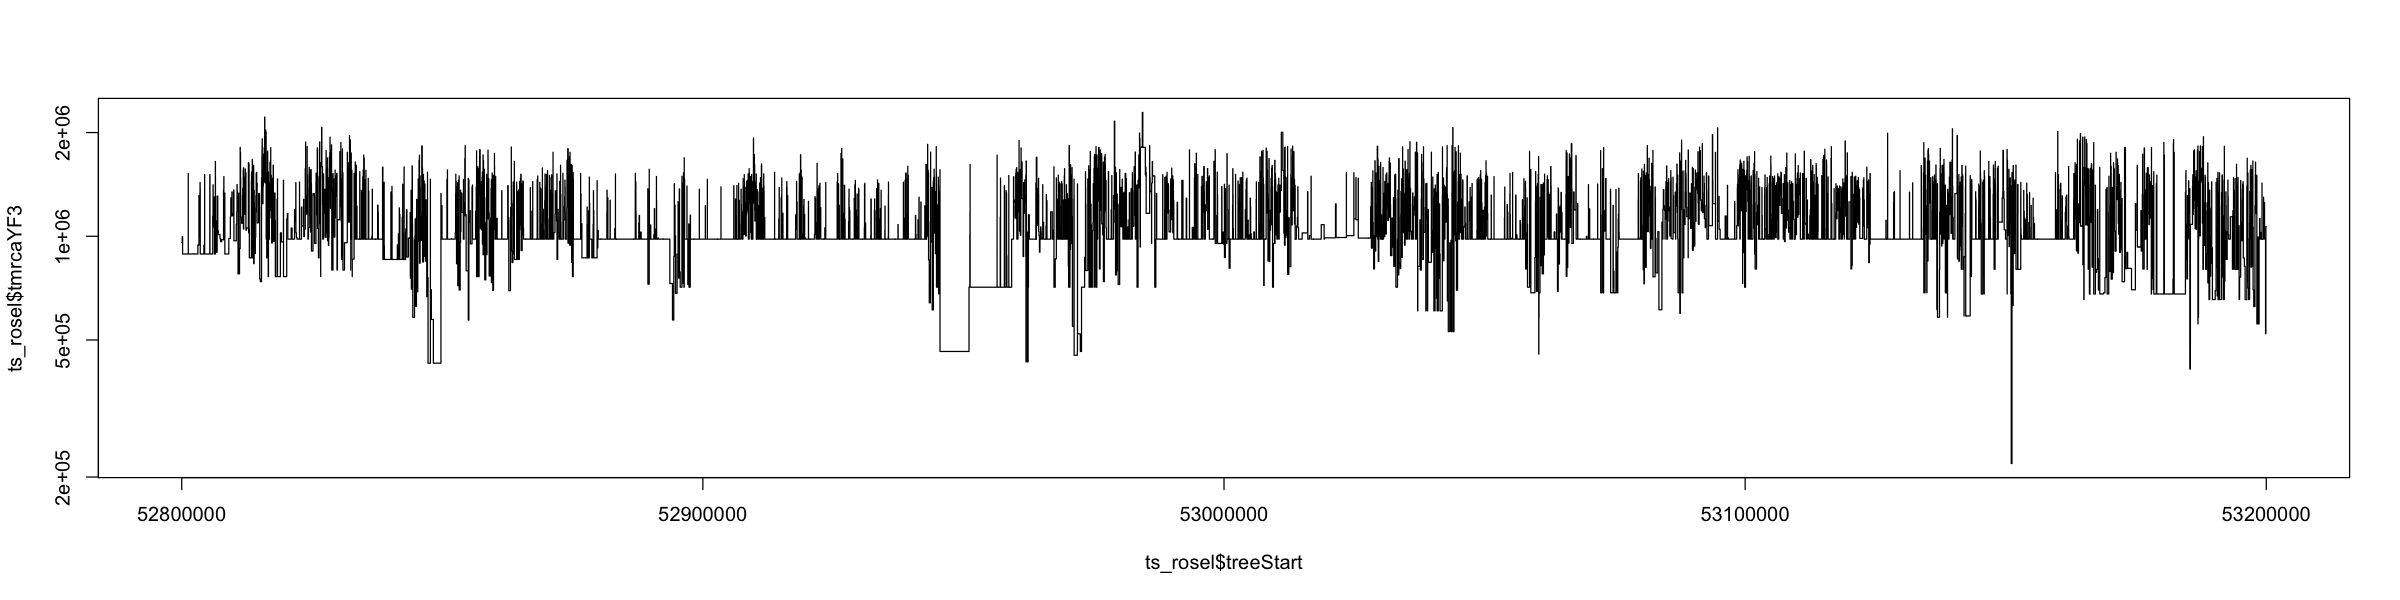

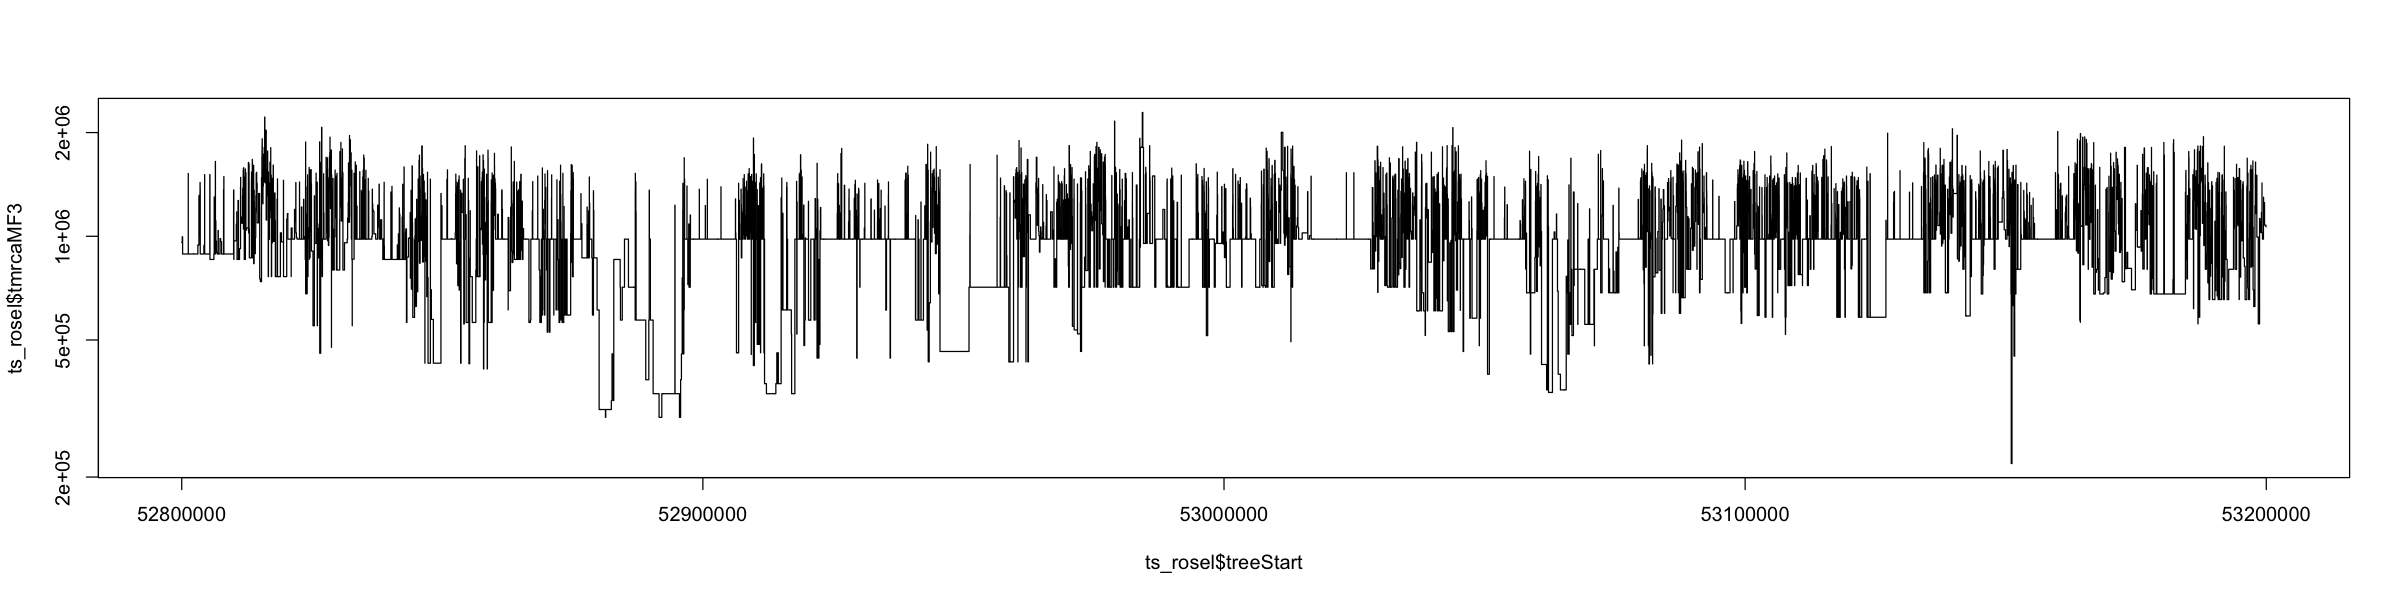

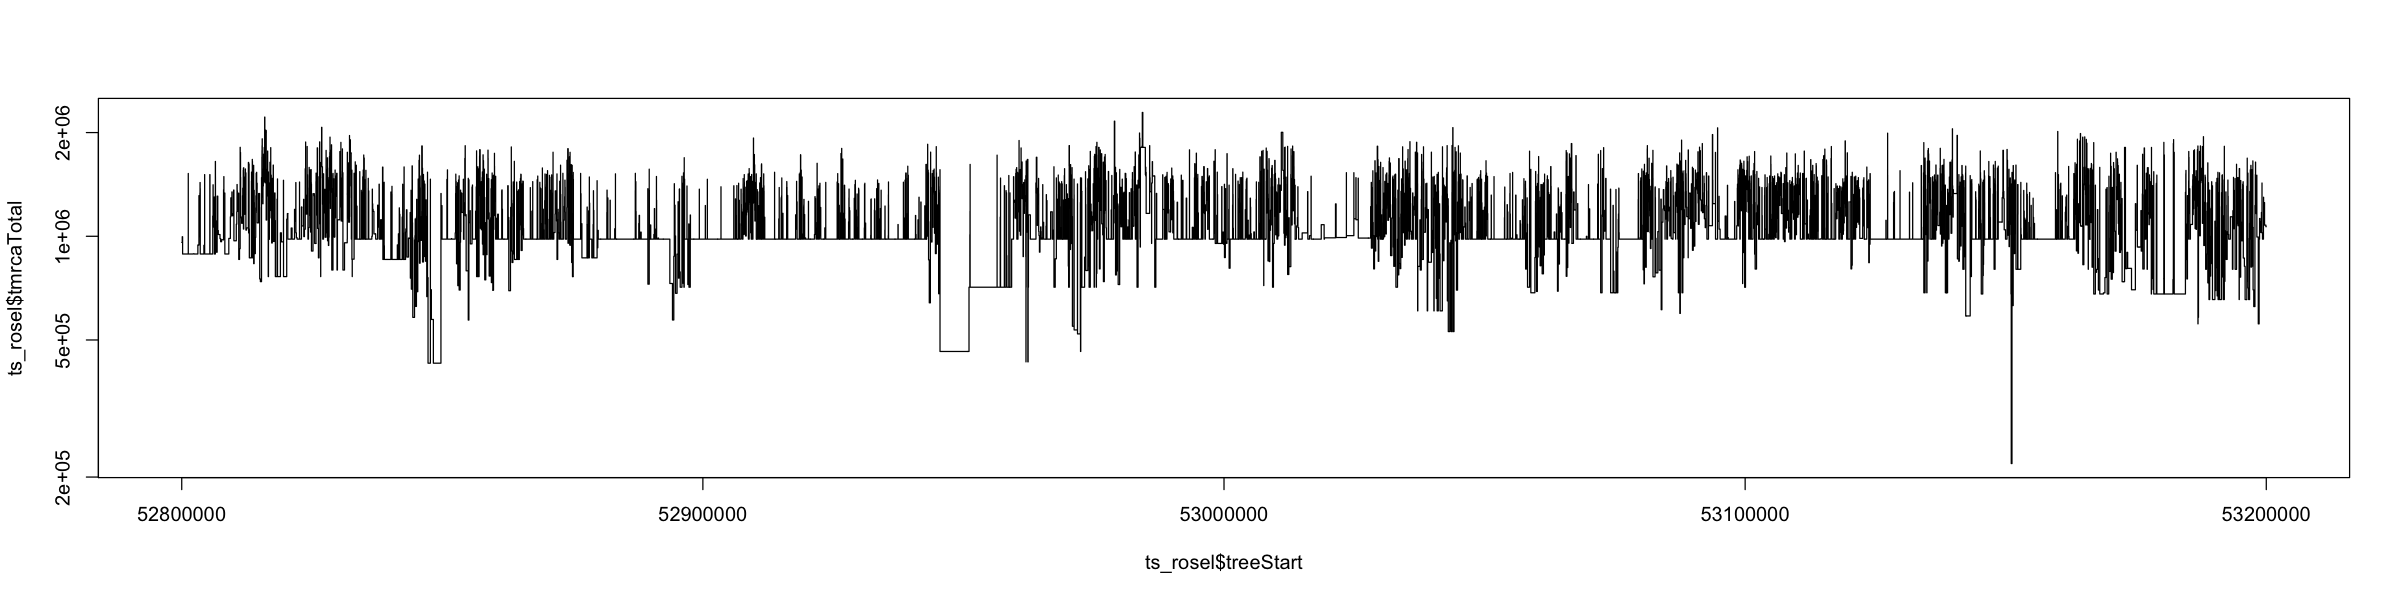

In [13]:
options(repr.plot.width=20, repr.plot.height=5)
xLimit=c(52800000, 53100000)
plot(ts_rosel$treeStart, ts_rosel$tmrcaYF3, type='s', log='y', xlim=xLimit, )
lines(ts_rosel$treeStart, ts_rosel$tmrcaMF3, type='s', log='y', xlim=xLimit)
lines(ts_rosel$treeStart, ts_rosel$tmrcaTotal, type='s', log='y', xlim=xLimit, lty=2)

In [ ]:
options(repr.plot.width=20, repr.plot.height=5)
plot(ts_rosel$treeStart, ts_rosel$tmrcaYF3, type='s', log='y')
plot(ts_rosel$treeStart, ts_rosel$tmrcaMF3, type='s', log='y')
plot(ts_rosel$treeStart, ts_rosel$tmrcaTotal, type='s', log='y')

In [ ]:
lty()